In [2]:
#diffusers is a hugging face page for using diffusion models from huggingface hub
!pip install diffusers transformers gradio accelerate

In [3]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

/opt/conda/envs/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
# model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|                 | 0/5 [00:00<?, ?it/s]/opt/conda/envs/myenv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading pipeline components...: 100%|█████████| 5/5 [00:00<00:00, 12.18it/s]


In [5]:
prompt = """a male boxer punching. make him look furious"""

In [6]:
image = pipe(prompt).images[0]

100%|███████████████████████████████████████| 50/50 [00:12<00:00,  4.10it/s]


[PROMPT]:  a male boxer punching. make him look furious


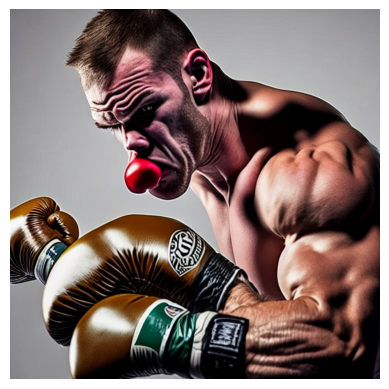

In [7]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [8]:
prompt2 = """dreamlike, Goddess coming down from the heaven with a weapon in one hand and other hand in the pose of blessing. Anger and divine energy
reflecting from her eyes.
She is in the form of a soldier and savior coming to protect the world from misery. She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris
"""

image = pipe(prompt2).images[0]

100%|███████████████████████████████████████| 50/50 [00:12<00:00,  4.16it/s]


[PROMPT]:  dreamlike, Goddess coming down from the heaven with a weapon in one hand and other hand in the pose of blessing. Anger and divine energy
reflecting from her eyes.
She is in the form of a soldier and savior coming to protect the world from misery. She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris



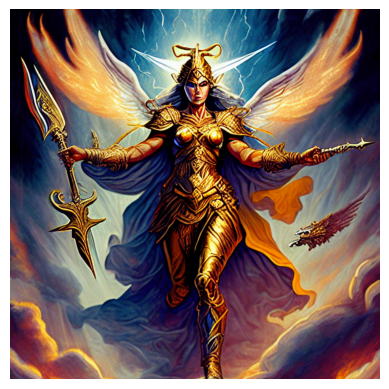

In [9]:
print('[PROMPT]: ',prompt2)
plt.imshow(image);
plt.axis('off');

In [10]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

In [11]:
prompt = "dreamlike, beautiful girl playing the festival of colors, draped in traditional Indian attire, throwing colors"

params = {}

100%|███████████████████████████████████████| 50/50 [00:12<00:00,  4.16it/s]


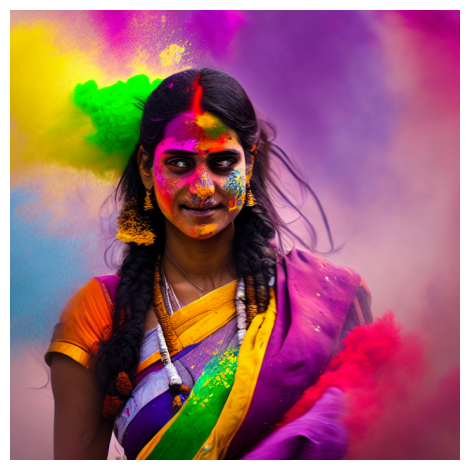

In [12]:
generate_image(pipe, prompt, params)

100%|█████████████████████████████████████| 100/100 [00:24<00:00,  4.12it/s]


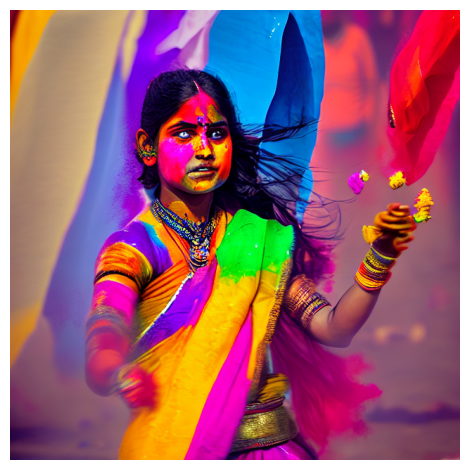

In [13]:
#num inference steps
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

100%|█████████████████████████████████████| 100/100 [00:29<00:00,  3.39it/s]


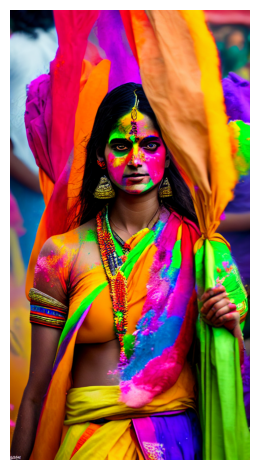

In [14]:
#height width
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)

100%|█████████████████████████████████████| 100/100 [00:44<00:00,  2.25it/s]


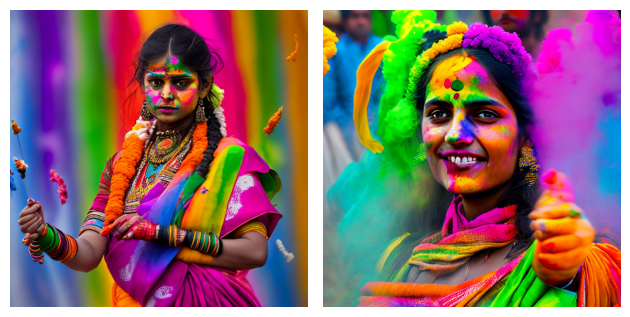

In [15]:
#num_images_per_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}

generate_image(pipe, prompt, params)

100%|█████████████████████████████████████| 100/100 [00:44<00:00,  2.25it/s]


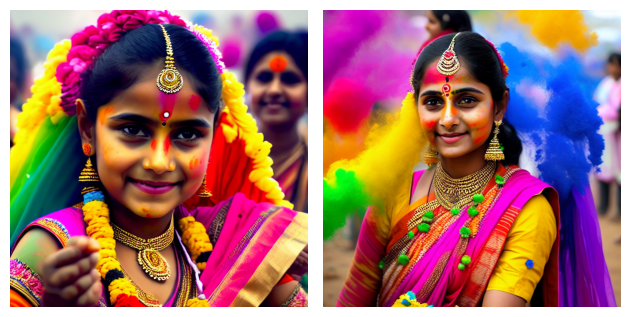

In [16]:
# negative_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}

generate_image(pipe, prompt, params)

100%|█████████████████████████████████████| 100/100 [00:44<00:00,  2.25it/s]


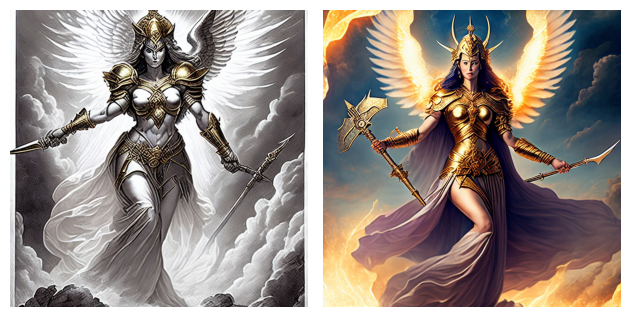

In [18]:
generate_image(pipe, prompt2, params)

In [26]:
def generate_image_interface(prompt, negative_prompt, num_inference_steps=50, weight=640):
  params = {'prompt': prompt, 'num_inference_steps': num_inference_steps, 'num_images_per_prompt':2, 'height':int(1.2*weight),
            'weight': weight, 'negative_prompt': negative_prompt}

  img = pipe(**params).images
  return img[0],img[1]

 28%|██████████▍                          | 145/512 [01:21<03:27,  1.77it/s]

In [20]:
import gradio as gr

In [27]:
demo = gr.Interface(generate_image_interface, inputs=["text","text",gr.Slider(1,100),gr.Slider(512,640)], outputs=["image","image"])

 29%|██████████▊                          | 149/512 [01:23<03:27,  1.75it/s]

In [28]:
demo.launch(share=True)

 29%|██████████▊                          | 150/512 [01:24<03:32,  1.70it/s]

Running on local URL:  http://127.0.0.1:7862


 30%|███████████                          | 153/512 [01:25<03:24,  1.75it/s]

Running on public URL: https://e334661ed987d3832f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


 30%|███████████▏                         | 155/512 [01:26<03:23,  1.76it/s]

 38%|██████████████▏                      | 196/512 [01:50<02:59,  1.76it/s]Traceback (most recent call last):
  File "/opt/conda/envs/myenv/lib/python3.12/site-packages/gradio/queueing.py", line 536, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/myenv/lib/python3.12/site-packages/gradio/route_utils.py", line 285, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/myenv/lib/python3.12/site-packages/gradio/blocks.py", line 1923, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/myenv/lib/python3.12/site-packages/gradio/blocks.py", line 1508, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/myenv/lib/python3.12/site-